In [2]:
import numpy as np
import pandas as pd
import os
from datetime import date
from os import listdir
from os.path import isfile, join
import sys
import math
from scipy.optimize import curve_fit

In [115]:
def weight_organizer():
    df_w = pd.DataFrame(index=range((45 + 46) * 14), columns=['animal', 'gender', 'week', 'weight'])
    temp_f = [185.34, 187.6, 196.35, 202.64, 183.67, 191.9, 188.6, 171.3, 184.05, 194.98,
              196.83, 208.33, 188.22, 202.46, 189.81, 193.62, 195.02, 191.71, 187, 187.26,
              186.1, 160.28, 175.57, 197.05, 182.74, 190.3, 180.08, 175.17, 177.49, 178.42,
              161.55, 169.24, 178.41, 169.24, 173.41, 197.73, 193.14, 198.93, 189.35, 190.14,
              212.24, 197.65, 173.21, 185.13, 182.52, 320.08, 275.01, 305.43, 299.46, 295.41,
              293.53, 280.19, 269.19, 305.66, 261.62, 309.02, 314.12, 323.77, 308.39, 287.83,
              260.75, 280.5, 270.76, 273.43, 277.71, 246.61, 299.27, 271.03, 272.48, 280.29,
              259.37, 274.55, 337.02, 314.78, 329.91, 338.82, 239.58, 271.75, 295.11, 293.17,
              299.15, 324.82, 285.76, 283.08, 298.42, 317.42, 309.9, 326.29, 316.38, 327.64,
              258.31, 204.05, 207.47, 215.33, 218.51, 202.14, 220.01, 203.62, 192.36, 199.68,
              207.8, 212.83, 220.65, 216.55, 206.71, 206.1, 216.17, 203.94, 209.78, 202.69,
              199.77, 198.88, 195.09, 201.55, 219.24, 200.9, 201.62, 192.2, 194.12, 194.29,
              198.41, 174.17, 186.14, 200.17, 184.56, 186.97, 216.45, 214.77, 221.81, 207.23,
              212.05, 225.55, 213.37, 197.97, 199.54, 193.01, 348.57, 306.97, 337.33, 328.4,
              325.87, 320.71, 318.92, 295.52, 311.63, 301.67, 342.57, 347.45, 358.47, 345.74,
              321.23, 294.34, 314.5, 294.59, 310.16, 299.82, 277.99, 336.04, 297.89, 305.96,
              321.07, 297.55, 307.69, 378.29, 352.3, 360.96, 375.22, 270.82, 308.31, 327.65,
              341.15, 331.06, 328.45, 324.83, 317.31, 336.85, 351.56, 336.05, 359.06, 355.22,
              366.46, 288.44, 215.26, 216.655, 229.665, 231.89, 216.265, 225.075, 216.56, 203.405,
              215.605, 222.01, 227.84, 235.57, 225.63, 224.57, 219.315, 232.965, 221.445, 221.48,
              213.785, 208.11, 204.46, 206.52, 215.85, 228.35, 212.065, 211.49, 201.375, 204.37,
              207.385, 206.395, 184.78, 196.59, 214.58, 198.94, 198.165, 231.155, 227.69, 233.885,
              220.035, 223.805, 239.41, 228.735, 215.88, 212.23, 205.24, 369.115, 329.355, 359.935,
              353.12, 350.735, 343.345, 342.29, 316.04, 337.69, 330.575, 370, 379.08, 387.455, 371.185,
              352.33, 320.135, 341.51, 315.19, 331.14, 323.1, 299.125, 360.74, 322.08, 334.515, 344.775,
              325.77, 344.13, 404.915, 378.05, 380.93, 398.265, 296.16, 334.055, 346.26, 365.825, 354.555,
              350.74, 337.44, 341.45, 368.935, 378.835, 359.51, 381.755, 381.54, 389.925, 309.525, 226.47,
              225.84, 244, 245.27, 230.39, 230.14, 229.5, 214.45, 231.53, 236.22, 242.85, 250.49, 234.71,
              242.43, 232.53, 249.76, 238.95, 233.18, 224.88, 216.45, 210.04, 217.95, 230.15, 237.46, 223.23,
              221.36, 210.55, 214.62, 220.48, 214.38, 195.39, 207.04, 228.99, 213.32, 209.36, 245.86, 240.61,
              245.96, 232.84, 235.56, 253.27, 244.1, 233.79, 224.92, 217.47, 389.66, 351.74, 382.54, 377.84,
              375.6, 365.98, 365.66, 336.56, 363.75, 359.48, 397.43, 410.71, 416.44, 396.63, 383.43, 345.93,
              368.52, 335.79, 352.12, 346.38, 320.26, 385.44, 346.27, 363.07, 368.48, 353.99, 380.57, 431.54,
              403.8, 400.9, 421.31, 321.5, 359.8, 364.87, 390.5, 378.05, 373.03, 350.05, 365.59, 401.02,
              406.11, 382.97, 404.45, 407.86, 413.39, 330.61, 235.875, 232.075, 244.75, 249.305, 231.255,
              232.48, 231.65, 218.395, 237.795, 238.615, 246.43, 253.64, 235.17, 248.165, 231.435, 254.37,
              237.835, 239.21, 226.21, 223.525, 214.335, 217.43, 226.65, 235.57, 224.61, 226.065, 213.815,
              219.1, 229.01, 212.745, 202.335, 213.17, 234.6, 222.6, 212.445, 249.505, 248.895, 241.76,
              239.82, 240.675, 257.625, 250.075, 247.555, 227.87, 220.815, 399.27, 364.19, 397.74, 382.12,
              382.35, 376.96, 388.61, 354.26, 379.69, 377.15, 409.85, 421.06, 432.66, 415.38, 393.86,
              357.57, 376.88, 335.86, 367.54, 366.53, 330.97, 408.09, 357.89, 382.24, 383.52, 369.68,
              404.88, 448.09, 418, 414.74, 441.96, 334.99, 370.55, 383.48, 411.53, 392.46, 378.15,
              356.74, 370.26, 411.25, 423.66, 391.94, 414.8, 430.79, 425.46, 338.88, 243.65, 242.84,
              247.14, 253.02, 239.57, 238.23, 238.2, 220.99, 245.18, 233.25, 253.79, 263.18, 244.37,
              257.19, 233.59, 263.16, 235.4, 249.1, 236.6, 232.75, 217.48, 210.88, 221.66, 236.44,
              231.21, 230.93, 205.1, 223.05, 238.95, 215.02, 210.31, 221.87, 239.99, 233.01, 218.49,
              247.56, 256.95, 254.63, 248.58, 251.69, 253.93, 256.39, 263.64, 233.94, 220.83, 415.85,
              386.09, 416.46, 402.71, 403.88, 400.29, 414.52, 377.94, 402.21, 389.7, 414.46, 433.27,
              448.16, 429.95, 412.47, 374.88, 394.94, 358.18, 385.52, 379.75, 346.37, 409.38, 385.72,
              402.17, 390.98, 372.74, 417.46, 462.93, 439.15, 424.16, 437.37, 336.86, 385.96, 409.47,
              408.76, 407.07, 392.34, 356.74, 386.35, 412.95, 446.39, 408.22, 433.63, 440.55, 439.67,
              350.29, 251.12, 251.74, 256.19, 265.36, 244.33, 244.86, 241.5, 233.01, 256.01, 233.03,
              257.28, 267.79, 249.88, 263.91, 228.76, 265.93, 244.79, 256.24, 221.33, 241.92, 233.13,
              213.86, 226.21, 249.4, 231.43, 232.4, 220.07, 234.35, 251.82, 225.68, 219.93, 222.92,
              245.73, 235.86, 220.96, 252.2, 268.66, 261.36, 254.07, 256.88, 261.45, 257.68, 263.07,
              239.54, 216.75, 432.62, 394.51, 435.22, 416.94, 417.56, 398.89, 414.68, 392.52, 406.69,
              393.73, 425.31, 443.16, 456.79, 447.84, 434.34, 384.9, 404.91, 383.73, 374.42, 396.07,
              351.44, 407.75, 372.13, 402.31, 401.81, 393.5, 421.23, 468.28, 456.47, 426.02, 458.06,
              352.2, 393.83, 411.9, 403.74, 418.01, 408.01, 386.14, 389.8, 429.79, 437.08, 429.04,
              319.26, 451.73, 446.47, 372.69, 249.04, 251.1, 253.23, 275.24, 244.93, 246.42, 238.77,
              224.17, 267.62, 240.18, 257.73, 281.2, 255.01, 280.5, 243.76, 278.38, 276.04, 259.81,
              243.89, 254.18, 232.38, 219.26, 234.69, 258.99, 236.74, 240.57, 228.3, 245.2, 249.6,
              233.95, 226.39, 234.4, 250.74, 245.53, 230.5, 251.76, 276.03, 267.67, 261.65, 262.53,
              273.61, 269.18, 277.87, 246.64, 228.94, 437.94, 390.86, 446.27, 428.37, 423.31, 410.57,
              424.33, 404.75, 414.08, 413.42, 432.42, 446.23, 469.97, 458.19, 442.57, 391.64, 411.55,
              380.86, 398.47, 401.95, 401.95, 415.02, 402.18, 408.41, 410.73, 401.01, 427.3, 469.81,
              453.89, 431.04, 465.64, 351.06, 403.24, 419.98, 416.95, 424.78, 410.44, 388.6, 402.41,
              437.62, 450.43, 444.35, 462.09, 465.7, 454.87, 454.87, 261.4, 257.36, 261.65, 275.72,
              261.94, 254.44, 252.53, 245.83, 279.32, 243.19, 276.52, 288.16, 260.37, 299.65, 259.85,
              298.77, 263.39, 269.42, 258.83, 255.01, 234.08, 229.81, 243.72, 263.37, 243.01, 246.19,
              240.21, 259.02, 265.79, 250.92, 234.67, 241.54, 268.31, 258.35, 238.89, 271.8, 278.6,
              285.99, 266.79, 272.38, 281.76, 285.27, 295.75, 258.78, 258.33, 456.77, 400.73, 472.45,
              449.58, 444.69, 430.06, 441.43, 424.59, 442.73, 442.56, 454.64, 470.21, 491.99, 480.59,
              470.05, 418.48, 442.16, 401.44, 420.83, 414.06, 385.455, 437.27, 389.75, 424.31, 420.76,
              426.39, 448.76, 490.12, 491.14, 461.27, 507.73, 369.62, 424.84, 439.2, 436.88, 447.41,
              426.88, 416.57, 430.95, 450.67, 469.01, 465.53, 485.01, 484.23, 479.5, 424.64, 264.83,
              264.78, 266.3, 284.06, 263.87, 260.7, 251.27, 249.98, 283, 255.45, 267.34, 289.76, 268.14,
              304.25, 268.85, 307.9, 324.67, 282, 256.41, 254.19, 236.3, 229.23, 246.54, 295.11, 243.95,
              248.72, 241.19, 260.6, 262.81, 252.87, 238.19, 238.01, 266.61, 247.92, 224.36, 270.26, 287,
              292.48, 302.49, 276.66, 276.66, 291.71, 309.83, 261.53, 284.99, 466.44, 409.14, 483.76, 460.99,
              450.34, 435.35, 443.02, 435.48, 437.54, 456.05, 459.44, 467.87, 498.01, 492.38, 473.68, 424.04,
              449.95, 407.08, 426.07, 424.54, 379.65, 445.28, 429.35, 430.12, 427.05, 424.06, 453.9, 505.76,
              494.87, 470.63, 518.64, 375.75, 425.65, 447.56, 446.97, 459.21, 437.68, 422.51, 439.41, 462.05,
              478.17, 470.68, 505.35, 491.12, 479.91, 404.47, 267.34, 274.97, 281.27, 289.37, 266.23, 281.36,
              267.59, 274.47, 290.98, 254.43, 277.37, 308.61, 285.2, 311.79, 293.37, 323.64, 299.31, 290.29,
              262.45, 266.78, 251.61, 238.44, 267.04, 257.9, 248.09, 255.67, 258.77, 261.3, 289.5, 260.41,
              247.62, 245.02, 273.94, 253.93, 259.26, 287.68, 314.28, 314.4, 285.92, 279.1, 320.11, 302.29,
              317.43, 262.1, 262.1, 475.93, 415.23, 505.08, 474.11, 472.37, 472.37, 453.6, 440.88, 443.35,
              475.95, 467.03, 495.33, 511.59, 509.49, 486.03, 438.59, 463.06, 417.16, 439.8, 431.95, 393.39,
              454.51, 436.49, 450.68, 439.79, 436.33, 465.43, 509.77, 518.23, 493.57, 544.09, 386.54, 447.42,
              463.43, 453.11, 468.28, 448.79, 435.49, 455.1, 479.85, 495.32, 486.64, 516.43, 502.37, 506.37,
              418.49, 276.24, 279.96, 276.96, 287.97, 270.82, 287.85, 278.61, 274.99, 304.84, 273.9, 293.35,
              307.8, 284.63, 312.16, 284.73, 320.52, 296.76, 288.26, 267.25, 258.72, 249, 243.88, 256.98,
              np.nan, 249.74, 257.3, 263, 269.79, 317.01, 255.4, 254.6, 259.14, 277.92, 271.56, 252.14,
              299.86, 338.25, 314.14, 288.67, 284.74, 308.92, 320.87, 325.39, 268.3, 296.86, 483.23, 416.5,
              508.78, 484.88, 473.31, 459.27, 462.64, 454.26, 458.76, 482.34, 474.06, 500.17, 504.85, 505.55,
              492.54, 452.29, 479.7, 432, 452.44, 439.59, 404.8, 470.53, 448.8, 457, 449.38, 437.96, 481.44,
              532.29, 527.66, 509.73, 552.22, 395.77, 456.83, 478.83, 465.73, 480.55, 460.23, 446.63, 473.01,
              486.59, 514.39, 490.65, 524.73, 511.31, 515.87, 431, 306.68, 302.92, 292.31, 301.67, 280.72,
              330.38, 292.15, 315.51, 325.99, 326.81, np.nan, np.nan, 306.51, 334.71, 323.24, np.nan, 290.4,
              283.9, 259.35, 255.41, 248.11, 257.58, 264.51, np.nan, 267.53, 266.97, 276.83, 285.81, 326.2,
              254.42, 274.52, 274.28, 304.26, 280.9, 280.53, np.nan, np.nan, 332.99, 312.2, 306.59,  np.nan,
              np.nan, np.nan, 299.93, 330.9, np.nan, 442.58, np.nan, np.nan, np.nan, np.nan, 482.1, 471.46,
              478.27, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 477.05, np.nan, 446.21, 466.59, 461.27,
              424.37, 453.15, 469.05, 470.77, 459.54, 444.51, np.nan, np.nan, np.nan, np.nan, np.nan, 413.3,
              np.nan, np.nan, 482.32, np.nan, np.nan, 465.2, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
              np.nan, 450.81, np.nan, 331.1, np.nan, np.nan, 312.2, np.nan, 309.8, np.nan, np.nan, 376.3,
              np.nan, np.nan, 363.3, np.nan, 357.1, np.nan, np.nan, np.nan, np.nan, np.nan, 265, 297.8,
              np.nan, np.nan, 261.8, 298.7, 327.2, np.nan, np.nan, 298.2, np.nan, np.nan, 336.2, np.nan,
              np.nan, np.nan, np.nan, 369.3, 341.9, 361.1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
              np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
              np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
              np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
              np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
              np.nan,
              ]

    temp_week = [8] * (45 + 46) + [10] * (45 + 46) + [12] * (45 + 46) + [13] * (45 + 46) + [16] * (45 + 46) + [22] * (
                45 + 46) + [23] * (45 + 46) + [24] * (45 + 46) + [31] * (45 + 46) + [34] * (45 + 46) + [38] * (
                            45 + 46) + [43] * (45 + 46) + [50] * (45 + 46) + [70] * (45 + 46)
    temp_g = (['female'] * 45 + ['male'] * 46) * 14
    animal = np.tile(np.arange(1, 92), 14)

    df_w['weight'] = pd.Series(temp_f, index=df_w.index)
    df_w['week'] = pd.Series(temp_week, index=df_w.index)
    df_w['gender'] = pd.Series(temp_g, index=df_w.index)
    df_w['animal'] = pd.Series(animal, index=df_w.index)
    df_w = df_w.dropna()
    return df_w


def wistar_w(g, h, x, y):
    # https://animal.ncku.edu.tw/p/412-1130-16363.php?Lang=en
    def fsigmoid(x, a, b):
        return a + b * np.log(x)

    def poly_2(x, a, b, c):
        return a * x + b * x**2 + c

    ress = np.nan

    _x = math.ceil(((21 * 24) + h) / (24 * 7))

    if g == str("male"):
        #popt, pcov = curve_fit(func, x, y)
        #a, b,c = popt
        popt, pcov = curve_fit(fsigmoid, x, y)
        a, b = popt
        ress = a + b * np.log(_x)
        #ress = a * _x + b * _x**2 + c
    elif g == str("female"):
        #popt, pcov = curve_fit(func, x, y)
        #a, b,c = popt
        popt, pcov = curve_fit(fsigmoid, x, y)
        a, b = popt
        ress = a + b * np.log(_x)
        #ress = a * _x + b * _x**2 + c
    else:
        print("You fucked up the gender on weight optimizer.")
    #print(_x)
    #print(a, b)
    return ress

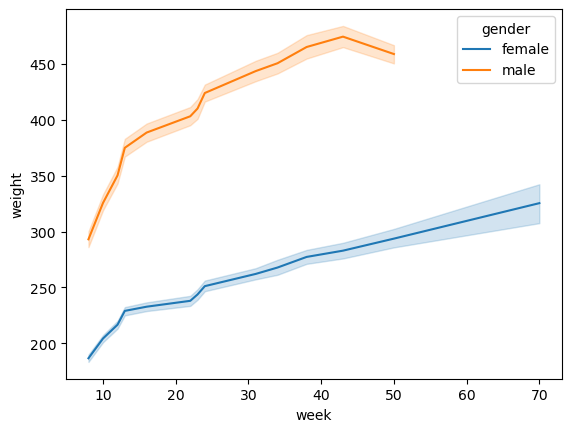

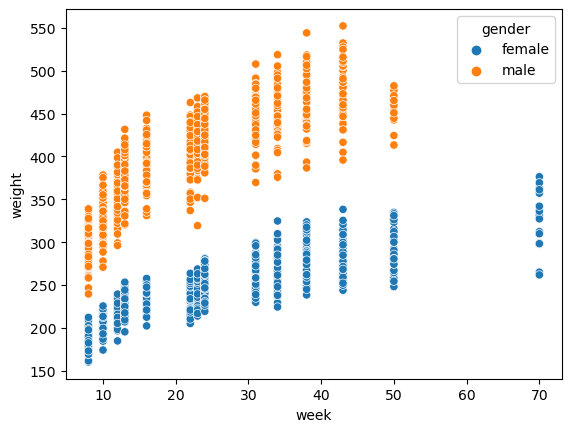

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
df = weight_organizer()
sns.lineplot(data=df, x=df['week'], y=df['weight'], hue= df['gender'])
plt.show()
sns.scatterplot(data=df, x=df['week'], y=df['weight'], hue= df['gender'])
plt.show()

In [19]:
def d_day_index(f, n):
    for i1 in range(n):
        f.loc[i1, ['day_index']] = i1+1
    return f


def state_hour(f, n):
    for i2 in range(n + 1):
        dn = 24 * i2
        f.loc[dn:dn + 6, ['state']] = str('dark')
        f.loc[dn + 7:dn + 18, ['state']] = str('light')
        f.loc[dn + 19:dn + 24, ['state']] = str('dark')
    return f

def state_(f, n):
    for i4 in range(n + 1):
        dn = 1440 * i4
        f.loc[dn:dn + 419, ['state']] = str('dark')
        f.loc[dn + 420:dn + 1139, ['state']] = str('light')
        f.loc[dn + 1140:dn + 1439, ['state']] = str('dark')
    return f


def day_and_hour_index(f, n):
    h_counter = 1
    for i5 in range(n + 1):
        dn = 1440 * i5
        f.loc[dn:dn + 1439, ['day_index']] = i5+1
        for j5 in range(24):
            interval_m = dn + (j5*60)
            f.loc[interval_m:interval_m + 60, ['hour_index']] = h_counter
            h_counter = h_counter + 1
    return f

def m_day_and_hour_index(f, n):
    h_counter = 1
    for i3 in range(n + 1):
        dn = 24 * i3
        f.loc[dn:dn + 23, ['day_index']] = i3+1
        for j3 in range(24):
            interval_m = dn + j3
            f.loc[interval_m:interval_m + 1, ['hour_index']] = h_counter
            h_counter = h_counter + 1
    return f
def threshup_():
    #DOI 10.1211/jpp.60.1.0008
    th_u_comft = 3.38 + 0.52
    #th_u_stretched = 4.63 + 0.44
    #th_u_burst = 6.63 + 0.92
    return th_u_comft


def real_consump(val, w, p):
    a = np.nan
    if (p == 5):
        a = (val*0.05*0.789)/(w) *1000
    elif (p == 10):
        a = (val*0.1*0.789)/(w) *1000
    elif ( p == 20 ):
        a = (val*0.2*0.789)/(w) *1000
    else:
        print("You messed up the input in real_consump function")
    return(a)

In [13]:
date_i = date(2020, 2, 12)
date_f = date(2020, 11, 17)

delta = date_f - date_i
number_of_days = int(delta.days) + 1
print("The experiment was {} days long".format(number_of_days))

total_length = number_of_days * 1440  # length of dataframe for minute time_scale

The experiment was 280 days long


In [27]:
path_ ='C:\\Users\\mehrd\\PycharmProjects\\drinkometer\\data\\2020\\dataframes'
print(path_)

C:\Users\mehrd\PycharmProjects\drinkometer\data\2020\dataframes


In [111]:
animal = 1025
box = 25
gender = str("male")
strain = str("wistar")

In [112]:
df1 = pd.read_excel("{}\drinkometer_df_{}_{}_{}_{}_consumption.xlsx".format(path_,strain, gender, animal, box))
df1_wl = pd.read_excel("{}\drinkometer_df_{}_{}_{}_{}_consumption.xlsx".format(path_,strain, gender, animal, box))

In [113]:
threshold_low = 0.08
threshold_up = threshup_()
total_length_h = number_of_days * 24

df_h = pd.DataFrame(index=range(number_of_days * 24), columns=['date', 'time', 'day_index', 'hour_index', 'animal',
                                                                   'box', 'strain', 'state', 'oxytocin', 'quinine',
                                                                   'water', 'alcohol_5', 'alcohol_10', 'alcohol_20',
                                                                   'locomotive'])
df_h = m_day_and_hour_index(df_h, number_of_days)
df_h = state_hour(df_h, number_of_days)

df_h['animal'] = animal
df_h['box'] = box
df_h['strain'] = strain
df_h['date'] = pd.date_range("2020-02-12", periods=number_of_days * 24, freq="H").strftime('%Y-%m-%d')
df_h['time'] = pd.date_range("2020-02-12", periods=number_of_days * 24, freq="H").strftime('%H:%M:%S')

hours = sorted(set(np.array(df1.loc[(df1['quinine'] == str('applied'))].hour_index)))
for i in range(len(hours)):
    df_h.loc[hours[i] - 1, 'quinine'] = str('applied')

hours = sorted(set(np.array(df1.loc[(df1['oxytocin'] == str('applied'))].hour_index)))
for i in range(len(hours)):
    df_h.loc[hours[i] - 1, 'oxytocin'] = str('applied')

for hour in range(1, number_of_days * 24 + 1):
    df_temp = weight_organizer()
    y_ = df_temp.loc[df_temp['gender'] == gender]["weight"]
    x_ = df_temp.loc[df_temp['gender'] == gender]["week"]
    w_w = wistar_w(gender, hour, x_, y_)
        # print(w_w)
    list_ = []
    ind = np.array(df_h.loc[(df_h['hour_index'] == hour)].index)
    df_extracted = df1.loc[(df1['hour_index'] == hour) & (df1['water'].notnull())]
    temp_arr = np.array(df_extracted['water'])
    if len(temp_arr[temp_arr > threshold_low]) > 1:
        _temp = np.nansum(temp_arr[temp_arr > threshold_low])
        if _temp < threshold_up:
            df_h.loc[ind, 'water'] = _temp
            _temp = np.nan

    list_ = []
    ind = np.array(df_h.loc[(df_h['hour_index'] == hour)].index)
    df_extracted = df1.loc[(df1['hour_index'] == hour) & (df1['alcohol_5'].notnull())]
    temp_arr = np.array(df_extracted['alcohol_5'])
    if len(temp_arr[temp_arr > threshold_low]) > 1:
        _temp = np.nansum(temp_arr[temp_arr > threshold_low])
        if _temp < threshold_up:
            temp__ = real_consump(_temp, w_w, 5)
            df_h.loc[ind, 'alcohol_5'] = temp__
            _temp = np.nan
            temp__ = np.nan

    list_ = []
    ind = np.array(df_h.loc[(df_h['hour_index'] == hour)].index)
    df_extracted = df1.loc[(df1['hour_index'] == hour) & (df1['alcohol_10'].notnull())]
    temp_arr = np.array(df_extracted['alcohol_10'])
    if len(temp_arr[temp_arr > threshold_low]) > 1:
        _temp = np.nansum(temp_arr[temp_arr > threshold_low])
        if _temp < threshold_up:
            temp__ = real_consump(_temp, w_w, 10)
            df_h.loc[ind, 'alcohol_10'] = temp__
            _temp = np.nan

    list_ = []
    ind = np.array(df_h.loc[(df_h['hour_index'] == hour)].index)
    df_extracted = df1.loc[(df1['hour_index'] == hour) & (df1['alcohol_20'].notnull())]
    temp_arr = np.array(df_extracted['alcohol_20'])
    if len(temp_arr[temp_arr > threshold_low]) > 1:
        _temp = np.nansum(temp_arr[temp_arr > threshold_low])
        if _temp < threshold_up:
            temp__ = real_consump(_temp, w_w, 20)
            df_h.loc[ind, 'alcohol_20'] = temp__
            _temp = np.nan

number_of_days = 280
for hour in range(1, number_of_days * 24 + 1):
    list_ = []
    ind = np.array(df_h.loc[(df_h['hour_index'] == hour)].index)
    df_extracted = df1_wl.loc[(df1_wl['hour_index'] == hour) & (df1_wl['locomotive'].notnull())]
    temp_arr = np.array(df_extracted['locomotive'])
    if len(temp_arr) > 1:
        df_h.loc[ind, 'locomotive'] = np.nansum(temp_arr)
        
df_h.to_excel(r'{}\drinkometer_df_{}_{}_{}_{}_hourly.xlsx'.format(path_, strain, gender, animal, box), index=False, header=True)


In [114]:

df_d_light = pd.DataFrame(index=range(number_of_days), columns=['date', 'day_index', 'animal', 'box',
                                                                    'strain', 'state', 'oxytocin', 'quinine', 'water',
                                                                    'alcohol_5', 'alcohol_10', 'alcohol_20',
                                                                    'locomotive'])

df_d_dark = pd.DataFrame(index=range(number_of_days), columns=['date', 'day_index', 'animal', 'box',
                                                                   'strain', 'state', 'oxytocin', 'quinine',
                                                                   'water', 'alcohol_5', 'alcohol_10', 'alcohol_20',
                                                                   'locomotive'])

df_d_light = d_day_index(df_d_light, number_of_days)
df_d_dark = d_day_index(df_d_dark, number_of_days)

df_d_light['animal'] = animal
df_d_light['box'] = box
df_d_light['strain'] = strain
df_d_light['state'] = str('light')
df_d_light['date'] = pd.date_range("2020-02-12", periods=number_of_days, freq="D").strftime('%Y-%m-%d')

df_d_dark['animal'] = animal
df_d_dark['box'] = box
df_d_dark['strain'] = strain
df_d_dark['state'] = str('dark')
df_d_dark['date'] = pd.date_range("2020-02-12", periods=number_of_days, freq="D").strftime('%Y-%m-%d')

days = sorted(set(np.array(df1.loc[(df1['quinine'] == str('applied'))].day_index)))
for i in range(len(days)):
    df_d_dark.loc[days[i] - 1, 'quinine'] = str('applied')
    df_d_light.loc[days[i] - 1, 'quinine'] = str('applied')

days = sorted(set(np.array(df1.loc[(df1['oxytocin'] == str('applied'))].day_index)))
for i in range(len(days)):
    df_d_dark.loc[days[i] - 1, 'oxytocin'] = str('applied')
    df_d_light.loc[days[i] - 1, 'oxytocin'] = str('applied')

for day in range(1, number_of_days + 1):
    list_ = []
    ind = np.array(df_d_light.loc[(df_d_light['day_index'] == day)].index)
    df_extracted = df_h.loc[
        (df_h['day_index'] == day) & (df_h['state'] == str('light')) & (df_h['water'].notnull())]
    temp_arr = np.array(df_extracted['water'])
    if len(temp_arr) > 1:
        df_d_light.loc[ind, 'water'] = np.nansum(temp_arr)
    df_extracted = df_h.loc[(df_h['day_index'] == day) & (df_h['state'] == str('dark')) & (df_h['water'].notnull())]
    temp_arr = np.array(df_extracted['water'])
    if len(temp_arr) > 1:
        df_d_dark.loc[ind, 'water'] = np.nansum(temp_arr)

    list_ = []

    df_extracted = df_h.loc[
        (df_h['day_index'] == day) & (df_h['state'] == str('light')) & (df_h['alcohol_5'].notnull())]
    temp_arr = np.array(df_extracted['alcohol_5'])
    if len(temp_arr) > 1:
        df_d_light.loc[ind, 'alcohol_5'] = np.nansum(temp_arr)
    df_extracted = df_h.loc[
        (df_h['day_index'] == day) & (df_h['state'] == str('dark')) & (df_h['alcohol_5'].notnull())]
    temp_arr = np.array(df_extracted['alcohol_5'])
    if len(temp_arr) > 1:
        df_d_dark.loc[ind, 'alcohol_5'] = np.nansum(temp_arr)

    list_ = []

    df_extracted = df_h.loc[
        (df_h['day_index'] == day) & (df_h['state'] == str('light')) & (df_h['alcohol_10'].notnull())]
    temp_arr = np.array(df_extracted['alcohol_10'])
    if len(temp_arr) > 1:
        df_d_light.loc[ind, 'alcohol_10'] = np.nansum(temp_arr)
    df_extracted = df_h.loc[
        (df_h['day_index'] == day) & (df_h['state'] == str('dark')) & (df_h['alcohol_10'].notnull())]
    temp_arr = np.array(df_extracted['alcohol_10'])
    if len(temp_arr) > 1:
        df_d_dark.loc[ind, 'alcohol_10'] = np.nansum(temp_arr)

    list_ = []

    df_extracted = df_h.loc[
        (df_h['day_index'] == day) & (df_h['state'] == str('light')) & (df_h['alcohol_20'].notnull())]
    temp_arr = np.array(df_extracted['alcohol_20'])
    if len(temp_arr) > 1:
        df_d_light.loc[ind, 'alcohol_20'] = np.nansum(temp_arr)
    df_extracted = df_h.loc[
        (df_h['day_index'] == day) & (df_h['state'] == str('dark')) & (df_h['alcohol_20'].notnull())]
    temp_arr = np.array(df_extracted['alcohol_20'])
    if len(temp_arr) > 1:
        df_d_dark.loc[ind, 'alcohol_20'] = np.nansum(temp_arr)

for day in range(1, number_of_days + 1):
    list_ = []
    ind = np.array(df_d_light.loc[(df_d_light['day_index'] == day)].index)
    df_extracted = df1_wl.loc[
        (df1_wl['day_index'] == day) & (df1_wl['state'] == str('light')) & (df1_wl['locomotive'].notnull())]
    temp_arr = np.array(df_extracted['locomotive'])
    if len(temp_arr) > 1:
        df_d_light.loc[ind, 'locomotive'] = np.nansum(temp_arr)
    df_extracted = df1_wl.loc[
        (df1_wl['day_index'] == day) & (df1_wl['state'] == str('dark')) & (df1_wl['locomotive'].notnull())]
    temp_arr = np.array(df_extracted['locomotive'])
    if len(temp_arr) > 1:
        df_d_dark.loc[ind, 'locomotive'] = np.nansum(temp_arr)

df_d_dark.to_excel(
    r'{}\drinkometer_df_{}_{}_{}_daily_dark.xlsx'.format(path_, strain, gender, animal, box),
    index=False, header=True)
df_d_light.to_excel(
    r'{}\drinkometer_df_{}_{}_{}_daily_light.xlsx'.format(path_, strain, gender, animal, box),
    index=False, header=True)